In [3]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 43.8 MB/s eta 0:00:00


In [4]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [5]:
mp_pose=mp.solutions.pose
pose=mp_pose.Pose(static_image_mode=True,min_detection_confidence=0.3,model_complexity=2)
mp_drawing=mp.solutions.drawing_utils

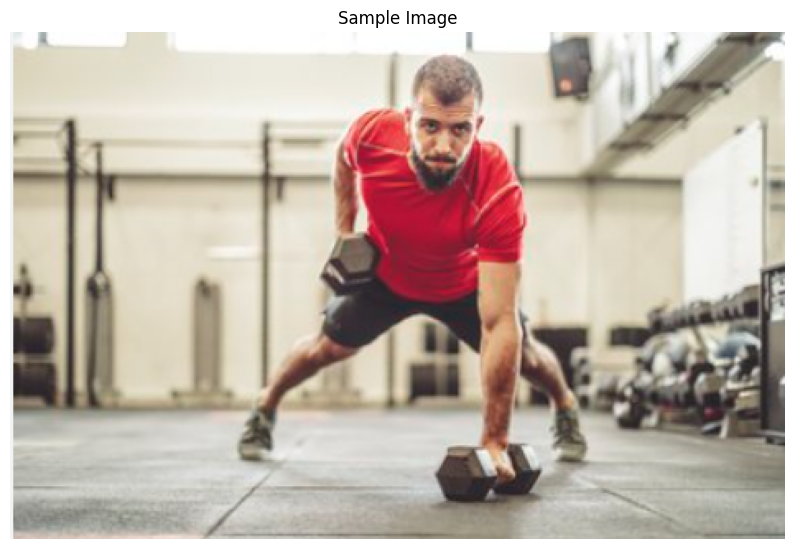

In [7]:
sample_img=cv2.imread('/content/Screenshot 2023-09-23 022203.png')
plt.figure(figsize=[10,10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [13]:
results=pose.process(cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB))
if results.pose_landmarks:
  for i in range(2):
    print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.5597781538963318
y: 0.22675327956676483
z: -0.7937687039375305
visibility: 0.9999865293502808

LEFT_EYE_INNER:
x: 0.5726816058158875
y: 0.1987570822238922
z: -0.7931774854660034
visibility: 0.9999821186065674



In [14]:
img_height,img_width,_=sample_img.shape
if results.pose_landmarks:
  for i in range(2):
    print(f'{mp_pose.PoseLandmark(i).name}:')
    print(f'x:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x*img_width}')
    print(f'y:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y*img_width}')
    print(f'z:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z*img_width}')
    print(f'visibility:{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x:263.6555104851723
y:106.80079467594624
z:-373.8650595545769
visibility:0.9999865293502808

LEFT_EYE_INNER:
x:269.733036339283
y:93.61458572745323
z:-373.5865956544876
visibility:0.9999821186065674



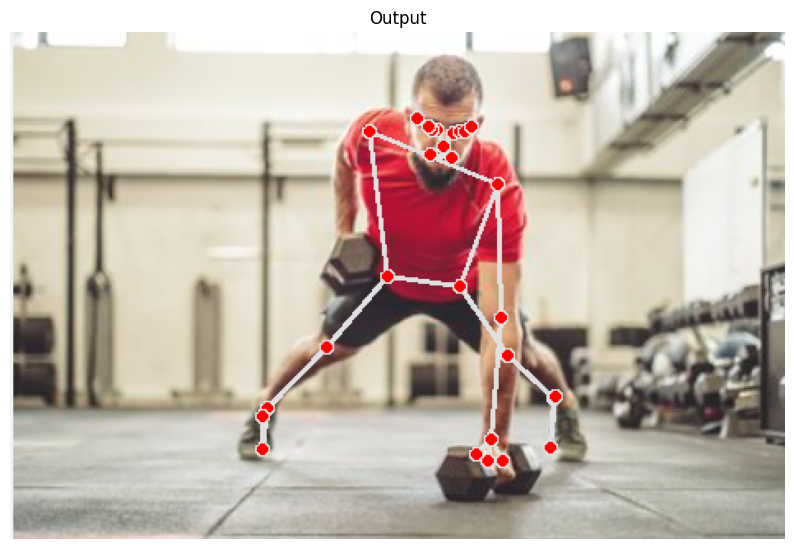

In [20]:
img_copy=sample_img.copy()
if results.pose_landmarks:
  mp_drawing.draw_landmarks(image=img_copy,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
  fig=plt.figure(figsize=[10,10])
  plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

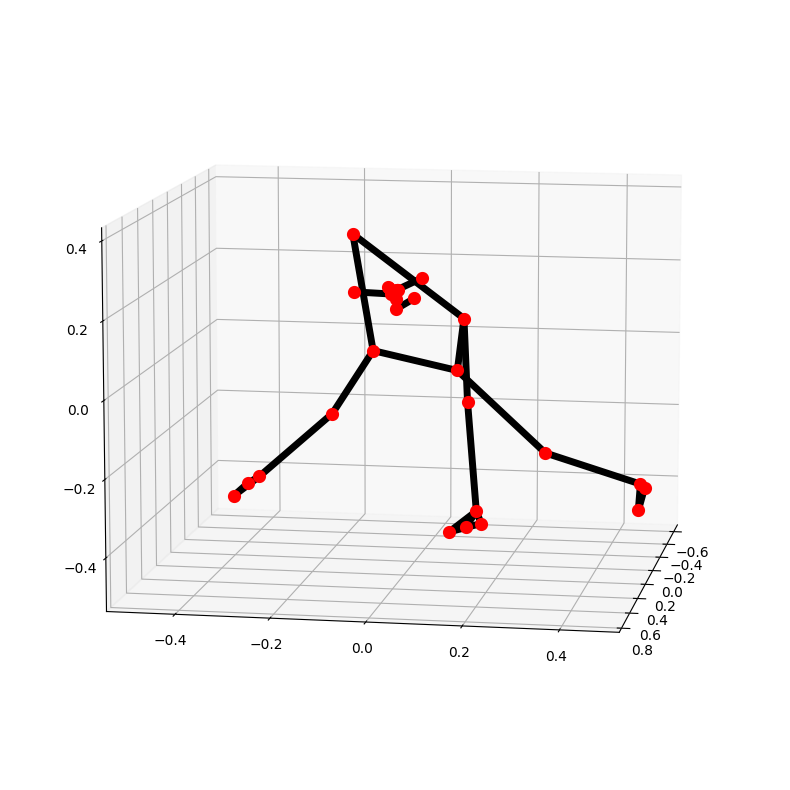

In [23]:
mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)

In [26]:
def detectPose(image,pose,display=True):
  output_image=image.copy()
  imageRGB=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  results=pose.process(imageRGB)
  height,width,_=image.shape
  landmarks=[]
  if results.pose_landmarks:
    mp_drawing.draw_landmarks(image=output_image,landmark_list=results.pose_landmarks,connections=mp_pose.POSE_CONNECTIONS)
    for landmark in results.pose_landmarks.landmark:
      landmarks.append((int(landmark.x*width),int(landmark.y*height),(landmark.z*width)))
  if display:
    plt.figure(figsize=[22,22])
    plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
    plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

    mp_drawing.plot_landmarks(results.pose_world_landmarks,mp_pose.POSE_CONNECTIONS)
  else:
    return output_image,landmarks

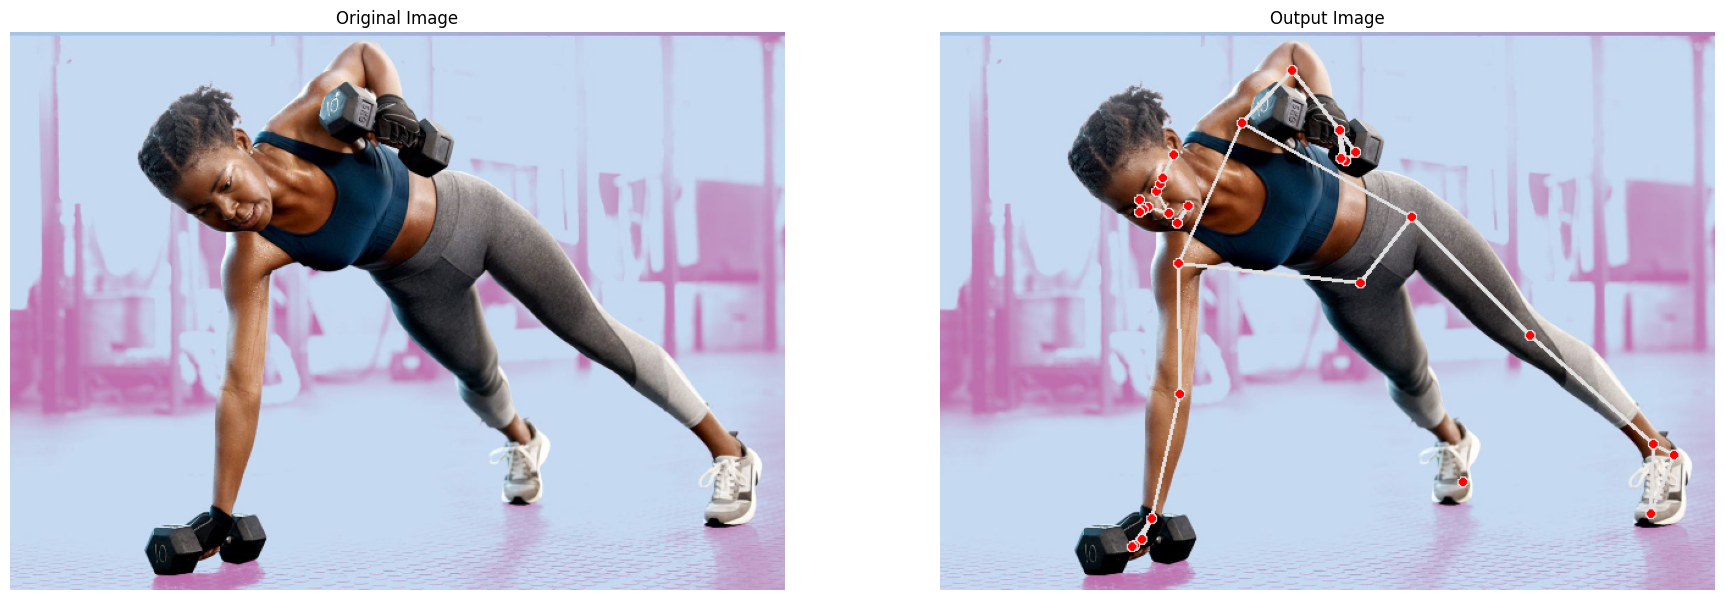

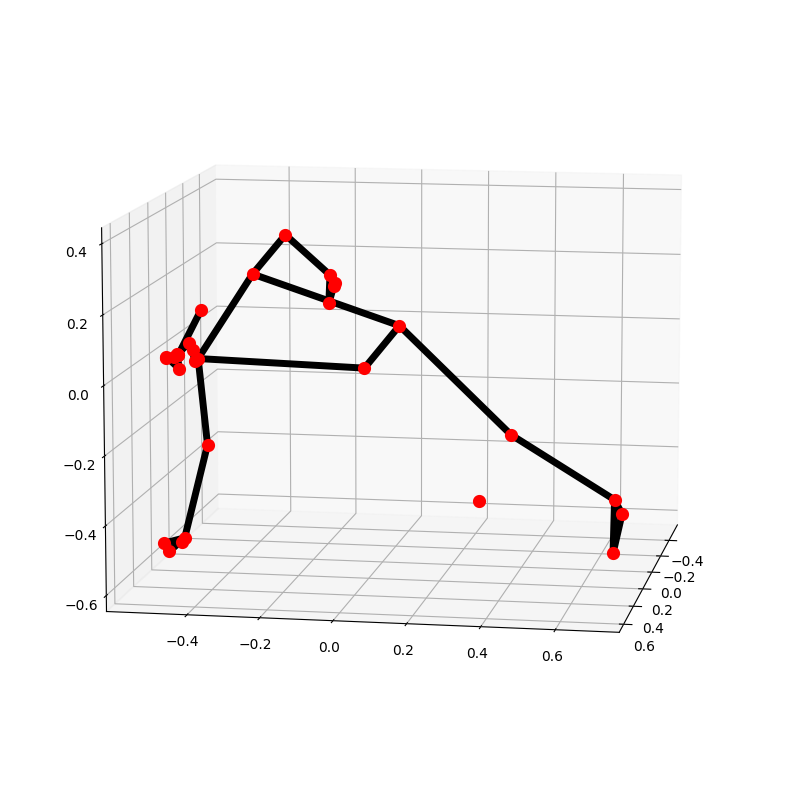

In [27]:
image=cv2.imread('/content/Screenshot 2023-09-23 031457.png')
detectPose(image,pose,display=True)

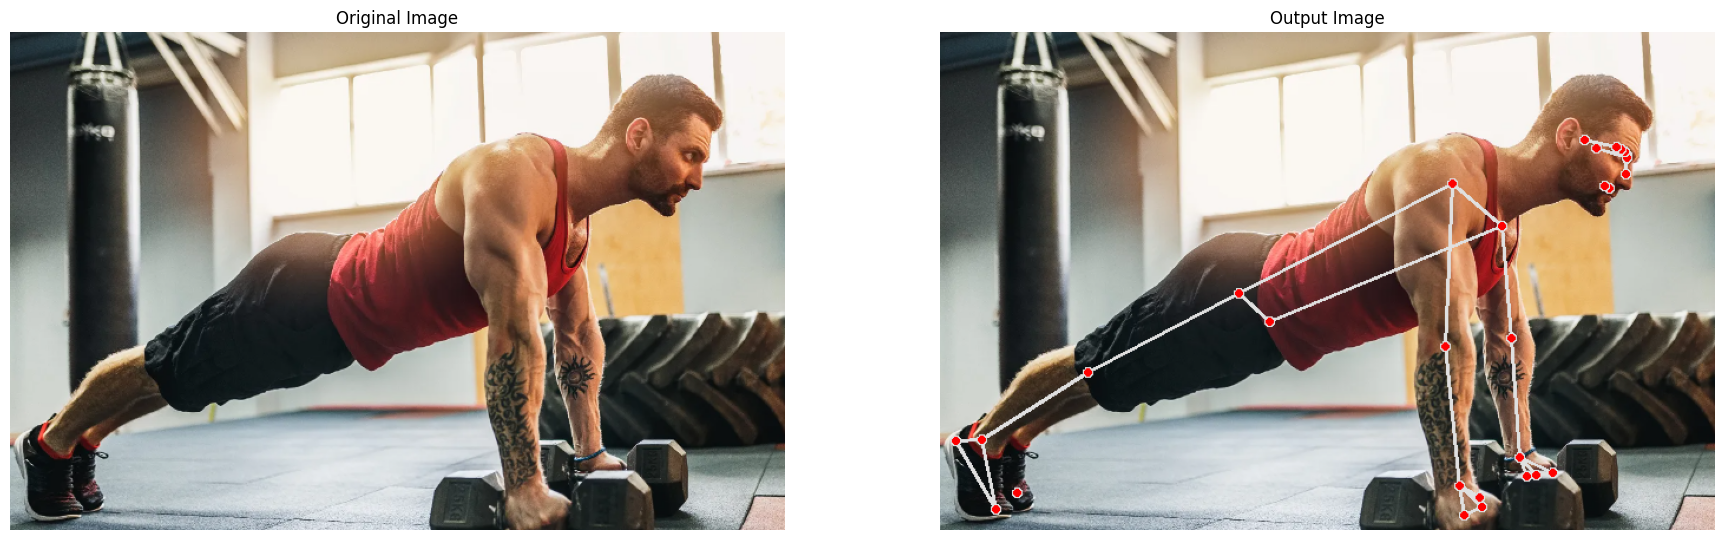

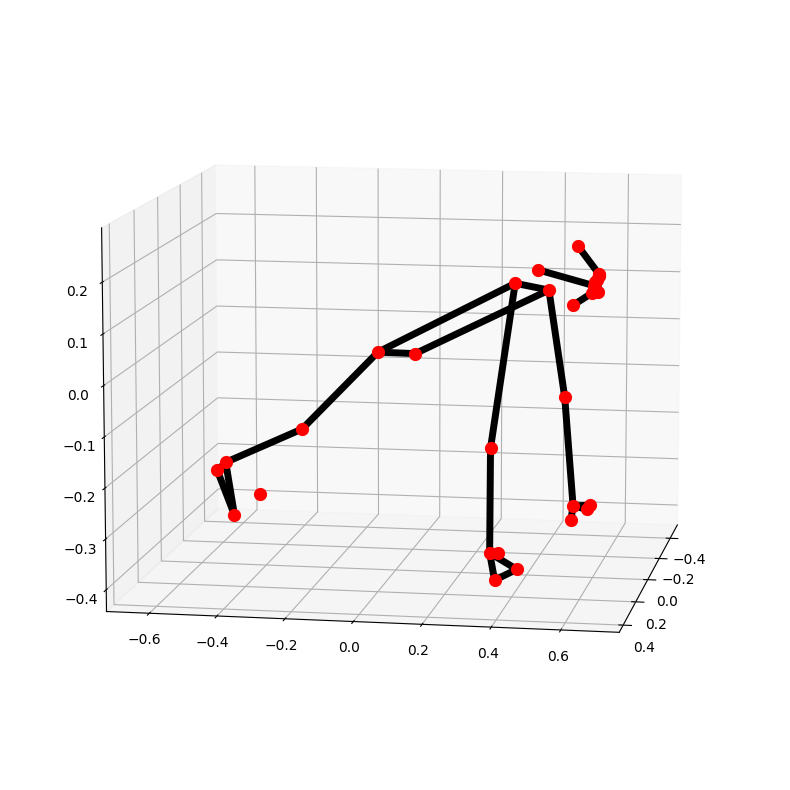

In [28]:
image=cv2.imread('/content/Screenshot 2023-09-23 032010.png')
detectPose(image,pose,display=True)